In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('Iris.csv')
print(data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_names = data['Species'].unique()
X = data.drop(columns=['Species'])
y = data['Species']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [4]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [5]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

print(f"Logistic Regression Accuracy: {evaluate_model(log_reg, X_test, y_test) * 100:.2f}%")
print(f"KNN Accuracy: {evaluate_model(knn, X_test, y_test) * 100:.2f}%")


Logistic Regression Accuracy: 100.00%
KNN Accuracy: 100.00%


In [6]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=3)

tree_clf.fit(X_train, y_train)
print(f"Decision Tree Accuracy: {evaluate_model(tree_clf, X_test, y_test) * 100:.2f}%")


Decision Tree Accuracy: 100.00%


In [7]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
print(f"Random Forest Accuracy: {evaluate_model(forest_clf, X_test, y_test) * 100:.2f}%")


Random Forest Accuracy: 100.00%


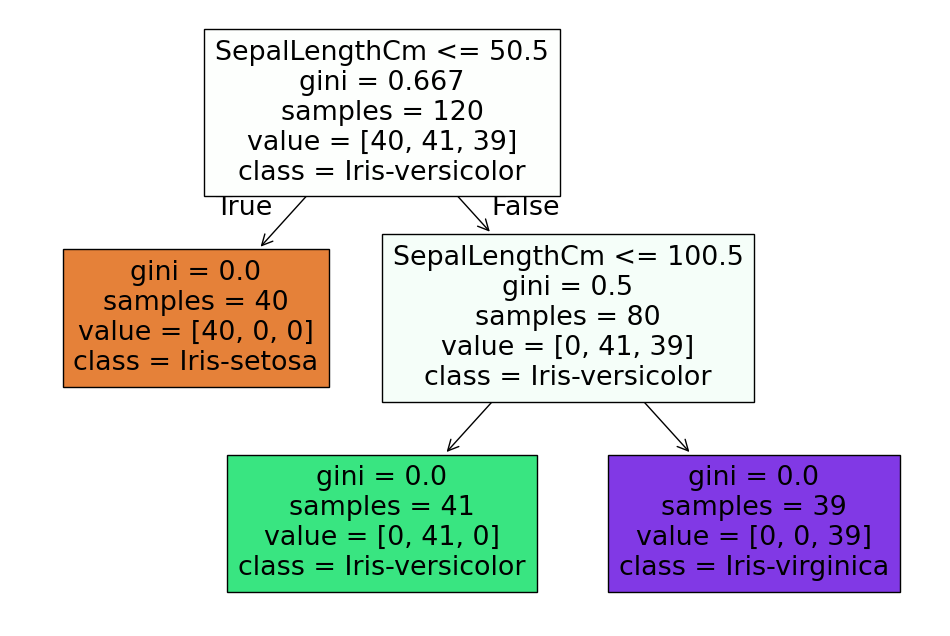

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()
